In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Test de convergence**

In [3]:
def L(A, r):
    # Calculer la plus grande valeur propre de A
    lambda_max = np.max(np.linalg.eigvals(A))
    # Calculer L
    L = (lambda_max / (r * (1 - lambda_max * r**2))) + (2 * lambda_max**2 * r / (1 - lambda_max * r**2)**2)
    return L

def cond_natur(A, b, r):
    c = b.T @ np.linalg.solve(A, b)
    alpha = (np.sqrt(1 + 4 * r**2 * c) - 1) / (2 * r * c)
    
    if np.linalg.norm(b) <= (r * np.max(np.linalg.eigvals(A)))/alpha: 
        print("La condition naturelle respectée")
    else: 
        print("La condition naturelle violée")

def convergence(i, L):
    if i < (1/L): 
        print("L'algorithme converge") ; print(1/L)
    else:
        print("L'algorithme ne converge pas"); print(1/L)

In [3]:
r = 0.9  # rayon r tel que 0 < r < 1
d = 1
A = np.eye(d) * np.random.uniform(0.5, 1, d)
b = np.random.rand(d) 

gamma_n = lambda n: y / ((n + z)**alpha)  # Séquence décroissante
c_n = lambda n: w / ((n + z)**beta)  # Séquence décroissante

n = 2000
y = 1
w = 1
z = 100
alpha = 1
beta = 0.35
pas = gamma_n(n)/(2 * c_n(n))

cond_natur(A, b, r)

convergence(pas, L(A, r))

print(f"\nStatistiques : [c_n(1) = {c_n(1):.3f} , c_n(2) = {c_n(2):.3f}, c_n(n) = {c_n(n):.3f}, Pas_final = {pas:.3f}]")

La condition naturelle respectée
L'algorithme converge
0.055209696074105294

Statistiques : [c_n(1) = 0.199 , c_n(2) = 0.198, c_n(n) = 0.069, Pas_final = 0.003]


# **5- Algoritme de Kiefer-Wolfowitz : Base canonique ($e_1, e_2, ...., e_n$)**

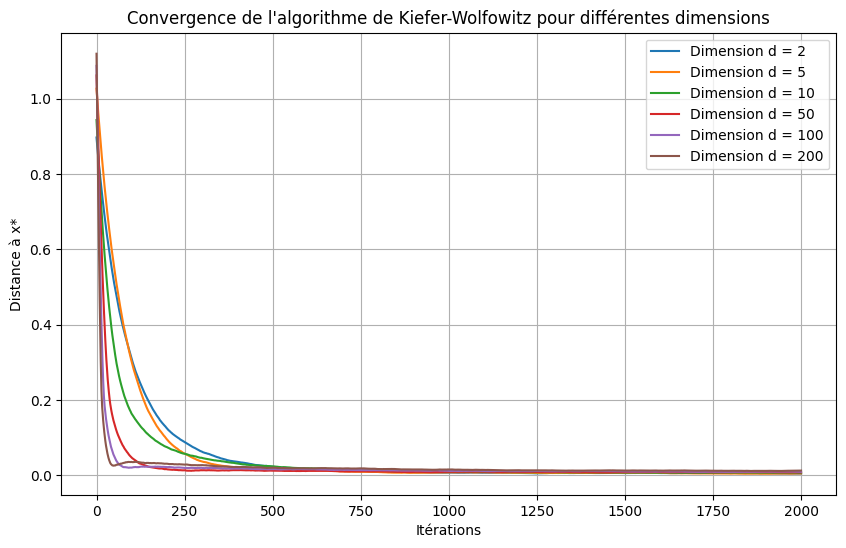

In [4]:
# Définir la fonction f(x)
def f(x, A, b, r):
    return (1 / (2 * r)) * np.log(1 - x.T @ A @ x) + np.dot(b, x)

# Paramètres globaux
y = 1
w = 1
alpha = 1
beta = 0.35
z = 100
r = 0.9
n_iterations = 2000

# Paramètres de visualisation
dimensions = [2, 5, 10, 50, 100, 200]

distances_per_dim = {}

for d in dimensions:
    
    A = np.eye(d) * np.random.uniform(0.5, 1, d) # Distribution uniforme 

    b = np.random.rand(d)  # b de taille d

    # Paramètres de l'algorithme de Kiefer-Wolfowitz
    gamma_n = lambda n: y / ((n + z)**alpha)  # Séquence décroissante
    c_n = lambda n: w / ((n + z)**beta)  # Séquence décroissante

    # Initialisation de l'algorithme
    X = np.zeros((n_iterations, d))  # Pour stocker les états

    # Générer les vecteurs aléatoires epsilon et varepsilon
    epsilon = np.random.normal(0, 0.01, size=(n_iterations, d)) # Distribution normale
    eta = np.random.normal(0, 0.01, size=(n_iterations, d)) # Distribution normale
    
    # Boucle de l'algorithme
    for n in range(n_iterations - 1):

        # Calculer les perturbations Y_{n+1} et Z_{n+1}
        Y_n = np.array([f(X[n] + c_n(n) * e_i, A, b, r) for e_i in np.eye(d)]) + epsilon[n]
        Z_n = np.array([f(X[n] - c_n(n) * e_i, A, b, r) for e_i in np.eye(d)]) + eta[n]

        # Mise à jour de X_{n+1}
        X[n + 1] = X[n] + (gamma_n(n) / (2 * c_n(n))) * (Y_n - Z_n)

    # Calculer le point de convergence théorique x*
    c = b.T @ np.linalg.solve(A, b)
    x_star = ((np.sqrt(1 + 4 * r**2 * c) - 1) / (2 * r * c)) * np.linalg.solve(A, b)

    # Calcul de la distance de X_n à x^* au fil des itérations
    distances = np.linalg.norm(X - x_star, axis=1)
    distances_per_dim[d] = distances  # Stocker les distances pour chaque dimension

# Visualisation de la convergence pour plusieurs dimensions
plt.figure(figsize=(10, 6))
for d, distances in distances_per_dim.items():
    plt.plot(distances, label=f"Dimension d = {d}")
plt.xlabel("Itérations")
plt.ylabel("Distance à x*")
plt.title("Convergence de l'algorithme de Kiefer-Wolfowitz pour différentes dimensions")
plt.grid(True)
# plt.yscale('log')
plt.legend()
plt.show()

## **6- Algoritme de Kiefer-Wolfowitz : Vecteurs aléatoires ($d_1, d_2, ...., d_n$)**

In [5]:
r = 0.9  # rayon r tel que 0 < r < 1
d = 10
A = np.eye(d) * np.random.uniform(0.5, 1, d)
b = np.random.rand(d)

gamma_n = lambda n: y / ((n + z)**alpha)  # Séquence décroissante
c_n = lambda n: w /((n + z)**beta)  # Séquence décroissante

n = 2000
y = 1
w = 1
alpha = 1
beta = 0.55
z = 3000
pas = (gamma_n(n)/(2 * c_n(n)))

cond_natur(A, b, r)

convergence(pas, L(A, r))

print(f"\nStatistiques : [c_n(1) = {c_n(1):.3f} , c_n(2) = {c_n(2):.3f}, c_n(n) = {c_n(n):.3f}, Pas_final = {pas:.3f}]")

La condition naturelle respectée
L'algorithme converge
0.020665274835395247

Statistiques : [c_n(1) = 0.012 , c_n(2) = 0.012, c_n(n) = 0.009, Pas_final = 0.011]


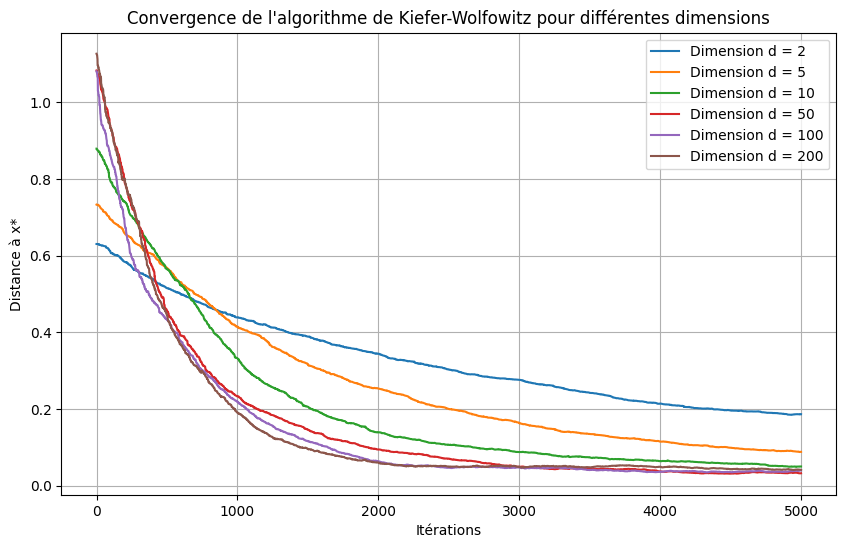

In [7]:
# Définir la fonction f(x)
def f(x, A, b, r):
    return (1 / (2 * r)) * np.log(1 - x.T @ A @ x) + np.dot(b, x)

# Paramètres globaux
y = 1
w = 1
alpha = 1
beta = 0.55
z = 2000 # pas considérablement réduit pour ne pas sortir de la fonction contenus des dimensions choisies
r = 0.9
n_iterations = 5000

# Paramètres de visualisation
dimensions = [2, 5, 10, 50, 100, 200]

distances_per_dim = {}

for d in dimensions:
    
    A = np.eye(d) * np.random.uniform(0.5, 1, d) # Distribution uniforme 

    b = np.random.rand(d)  # b de taille d

    # Paramètres de l'algorithme de Kiefer-Wolfowitz
    gamma_n = lambda n: y / ((n + z)**alpha)  # Séquence décroissante
    c_n = lambda n: w / ((n + z)**beta)  # Séquence décroissante

    # Initialisation de l'algorithme
    X = np.zeros((n_iterations, d))  # Pour stocker les états

    # X[0] = np.random.normal(0, 0.01, d)

    # Générer les vecteurs aléatoires epsilon et varepsilon
    epsilon = np.random.normal(0, 0.01, size=(n_iterations, d))
    eta = np.random.normal(0, 0.01, size=(n_iterations, d))
    
    
    # Boucle de l'algorithme
    for n in range(n_iterations - 1):

        d_n = np.random.multivariate_normal(np.zeros(d), np.eye(d))
        
        # Calculer Y_{n+1} et Z_{n+1}
        Y_n = f(X[n] + c_n(n) * d_n, A, b, r) + epsilon[n]
        Z_n = f(X[n] - c_n(n) * d_n, A, b, r) + eta[n]

        # Mise à jour de X_{n+1}
        X[n + 1] = X[n] + (gamma_n(n) / (2 * c_n(n))) * d_n * (Y_n - Z_n)

    # Calculer le point de convergence théorique x*
    c = b.T @ np.linalg.solve(A, b)
    x_star = ((np.sqrt(1 + 4 * r**2 * c) - 1) / (2 * r * c)) * np.linalg.solve(A, b)

    # Calcul de la distance de X_n à x^* au fil des itérations
    distances = np.linalg.norm(X - x_star, axis=1)
    distances_per_dim[d] = distances  # Stocker les distances pour chaque dimension

# Visualisation de la convergence pour plusieurs dimensions
plt.figure(figsize=(10, 6))
for d, distances in distances_per_dim.items():
    plt.plot(distances, label=f"Dimension d = {d}")
plt.xlabel("Itérations")
plt.ylabel("Distance à x*")
plt.title("Convergence de l'algorithme de Kiefer-Wolfowitz pour différentes dimensions")
plt.grid(True)
# plt.yscale('log')
plt.legend()
plt.show()

# **7- Application de l'algorithme de Kiefer-Wolfowitz sur des données**

## **Exemple 1 : Données fleurs d'IRIS (Classe binaire)**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Charger et préparer les données (par exemple avec les classes 0 et 1 pour simplifier)
data = load_iris()
X = data.data[data.target != 2]  # Garde les classes 0 et 1 pour la régression logistique binaire
y = data.target[data.target != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliser les données pour stabiliser la convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fonction sigmoïde pour la probabilité
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fonction de perte logistique (Maximum du log de vraisemblance)
def loss(theta, X, y):
    p = sigmoid(X @ theta)
    return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [8]:
# Description
# print(data)
# print(data["target"])
# print(data["target_names"])
# print(data["feature_names"])
# print(data["DESCR"])

In [9]:
# Algorithme de Kiefer-Wolfowitz pour minimiser la perte multi-classe

# Paramètres globaux
s, w, alpha, beta, z, n_iterations = 1, 1, 1, 0.35, 100, 2000

# Paramètres de l'algorithme de Kiefer-Wolfowitz
gamma_n = lambda n: s / ((n + z)**alpha)  # Séquence décroissante
c_n = lambda n: w / ((n + z)**beta)  # Séquence décroissante
d = X.shape[1]

# Initialisation des paramètres
theta = np.zeros(d)
losses = []

for n in range(n_iterations):
    # Perturbation aléatoire
    d_n = np.random.normal(0, 1, d)
    
    # Calcul des probabilités avec perturbations
    p_plus = loss(theta + c_n(n) * d_n, X_train, y_train)
    p_minus = loss(theta - c_n(n) * d_n, X_train, y_train)
    
    # Estimation du gradient stochastique par différence
    grad_estimate = (p_plus - p_minus) * d_n / (2 * c_n(n))
    
    # Mise à jour des paramètres
    theta = theta + gamma_n(n) * grad_estimate
    
    # Calcul de la perte actuelle pour suivi
    current_loss = loss(theta, X_train, y_train)
    losses.append(current_loss)

# Afficher les résultats
print(f"Paramètres optimisés : {theta}")
print(f"Perte finale : {-losses[-1]}")

# Évaluer la précision sur l'ensemble de test
outputs = sigmoid(X_test @ theta) > 0.5
y_pred = outputs.astype(np.int_)
accuracy = np.mean(y_pred == y_test)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")

Paramètres optimisés : [-0.1091766  -0.66078042  0.89988047  0.45183269]
Perte finale : 0.19056937732711499
Précision sur l'ensemble de test : 100.00%


## **Exemple 2 : Données fleurs d'IRIS (Multiclasses)**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Charger et préparer les données
data = load_iris()
X, y = data.data, data.target
# X, y = data.data[data.target != 2] , data.target[data.target != 2] ## Test sigmoid
n_classes = len(np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encodage one-hot pour y
Y_train = np.eye(n_classes)[y_train]

# Normaliser les données pour stabiliser la convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fonction softmax
def softmax(z):
    exp_z = np.exp(z)  # Pour éviter les débordements
    return exp_z / exp_z.sum(axis=1, keepdims=True)

# Fonction de perte multi-classe
def loss(theta, X, Y):
    logits = X @ theta
    probs = softmax(logits)
    return np.mean(np.sum(Y * np.log(probs), axis=1))

In [11]:
# Algorithme de Kiefer-Wolfowitz pour minimiser la perte multi-classe

# Paramètres globaux
s, w, alpha, beta, z, n_iterations = 1, 1, 1, 0.35, 100, 2000
d = X.shape[1]

# Paramètres de l'algorithme de Kiefer-Wolfowitz
gamma_n = lambda n: s / ((n + z)**alpha)  # Séquence décroissante
c_n = lambda n: w / ((n + z)**beta)  # Séquence décroissante

# Initialisation des paramètres pour chaque classe
theta = np.zeros((d, n_classes))
losses = []

for n in range(n_iterations):
    # Perturbations pour chaque classe
    d_n = np.random.normal(0, 4, (d, n_classes))
    
    # Calcul de la perte avec perturbations dans les deux directions
    loss_plus = loss(theta + c_n(n) * d_n, X_train, Y_train)
    loss_minus = loss(theta - c_n(n) * d_n, X_train, Y_train)
    
    # Estimation du gradient stochastique par différence
    grad_estimate = (loss_plus - loss_minus) * d_n / (2 * c_n(n)) 
    
    # Mise à jour des paramètres
    theta += gamma_n(n) * grad_estimate
    
    # Calcul de la perte actuelle pour suivi
    current_loss = loss(theta, X_train, Y_train)
    losses.append(current_loss)

# Afficher les résultats
print(f"Paramètres optimisés :\n {theta}")
print(f"Perte finale : {-losses[-1]}")

# Évaluer la précision sur l'ensemble de test
logits_test = X_test @ theta
y_pred = np.argmax(softmax(logits_test), axis=1)
accuracy = np.mean(y_pred == y_test)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")

Paramètres optimisés :
 [[-0.79894375  0.63431376 -0.01847167]
 [ 1.33553069 -1.62969141  0.02949195]
 [-1.46846161 -0.09688709  1.49090468]
 [-1.85999207 -0.32602936  1.31088573]]
Perte finale : 0.32908609497492103
Précision sur l'ensemble de test : 86.67%


## **Exemple 3 : Données numériques sur le logement en Californie**

In [15]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger les données California Housing (en remplacement de Boston Housing)
data = fetch_california_housing()
X, y = data.data, data.target

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliser les données pour stabiliser la convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Fonction de perte : "MSE opposée" pour faire la maximisation
def mse_loss(theta, X, y):
    predictions = X @ theta
    return -np.mean((y - predictions) ** 2)

In [16]:
# print(data["DESCR"])

In [17]:
# Algorithme de Kiefer-Wolfowitz pour la MSE

# Paramètres globaux
s, w, alpha, beta, z, n_iterations = 1, 1, 1, 0.35, 100, 2000
d = X_train.shape[1]

# Paramètres de l'algorithme de Kiefer-Wolfowitz
gamma_n = lambda n: s / ((n + z)**alpha)  # Séquence décroissante
c_n = lambda n: w / ((n + z)**beta)  # Séquence décroissante

# Initialisation des paramètres
theta = np.zeros(d)
losses = []

for n in range(n_iterations):
    # Perturbation aléatoire
    d_n = np.random.normal(0, 4, d)
    
    # Calcul de la perte avec perturbations dans les deux directions
    loss_plus = mse_loss(theta + c_n(n) * d_n, X_train, y_train)
    loss_minus = mse_loss(theta - c_n(n) * d_n, X_train, y_train)
    
    # Estimation du gradient stochastique par différence
    grad_estimate = (loss_plus - loss_minus)* d_n / (2 * c_n(n)) 
    
    # Mise à jour des paramètres
    theta += gamma_n(n) * grad_estimate
    
    # Calcul de la perte actuelle pour suivi
    current_loss = mse_loss(theta, X_train, y_train)
    losses.append(current_loss)

# Afficher les résultats
print(f"Paramètres optimisés :\n {theta}")
print(f"Perte finale sur l'ensemble d'entraînement : {-losses[-1]}")

# Évaluer la performance sur l'ensemble de test
mse_test = -mse_loss(theta, X_test, y_test)
print(f"Perte (MSE) sur l'ensemble de test : {mse_test}")

Paramètres optimisés :
 [ 0.72080443  0.10342171 -0.23385305  0.27978295 -0.00175631 -0.03551463
 -0.79708863 -0.77391828]
Perte finale sur l'ensemble d'entraînement : 0.3907687205967224
Perte (MSE) sur l'ensemble de test : 0.3951812194625293


In [18]:
theta_star = np.linalg.solve(X_train.T@X_train, X_train.T@y_train)# paramètre optimal
np.linalg.norm(theta-theta_star)# Modèle très proche du theta optimal

0.04911515699393863

## **Cohérence du modèle Kiefer-Wolwovitz avec le modèle de régression linéaire**

In [19]:
from sklearn.linear_model import LinearRegression

# Entraîner le modèle sur X et y standardisés
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

-mse_loss(theta, X_test, y_pred) ## prédiction très proches

0.00011749924508298146